In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.api as sm
%matplotlib inline

In [2]:
import cv2

In [3]:
import os

In [10]:
datadir = '/Users/skylark/Desktop/notes'
catagories = ['hundred', 'ten']

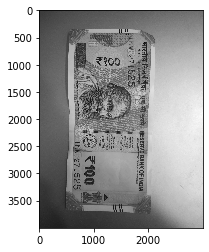

In [11]:
for cat in catagories:
    path = os.path.join(datadir, cat)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break    

In [12]:
img_array

array([[ 52,  52,  53, ...,  95,  95,  94],
       [ 49,  49,  51, ...,  95,  96,  97],
       [ 53,  53,  53, ...,  97,  97,  97],
       ...,
       [ 33,  34,  34, ..., 154, 155, 155],
       [ 34,  34,  35, ..., 155, 156, 156],
       [ 34,  34,  35, ..., 155, 155, 155]], dtype=uint8)

In [15]:
img_array.shape

(4000, 3000)

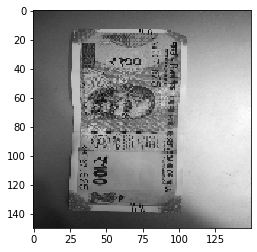

In [19]:
new_array = cv2.resize(img_array, (150,150))
plt.imshow(new_array, cmap='gray')

In [12]:
train = []
def create_train():
    for cat in catagories:
        path = os.path.join(datadir, cat)
        class_num = catagories.index(cat)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (150,150))
                train.append([new_array, class_num])
            except Exception as e:
                pass

In [13]:
create_train()

In [14]:
len(train)

240

In [15]:
from random import shuffle

In [16]:
shuffle(train)

In [17]:
x = []
y = []

In [18]:
for f,l in train:
    x.append(f)
    y.append(l)

In [19]:
x = np.array(x).reshape(-1,150,150,1)

In [20]:
y = np.array(y)

In [21]:
len(x), len(y)

(240, 240)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.8)

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
from tensorflow import keras

/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passi

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

Using TensorFlow backend.


In [26]:
model = Sequential()

In [27]:
train_x = train_x/255
test_x = test_x/255

In [28]:
model.add(Conv2D(128, (3,3), input_shape=train_x.shape[1:],activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
model.fit(train_x, train_y, batch_size=32, epochs=20)

Epoch 1/20
48/48 [==============================] - 4s 73ms/step - loss: 0.5959 - accuracy: 0.7083
Epoch 2/20
48/48 [==============================] - 4s 85ms/step - loss: 0.5674 - accuracy: 0.6458
Epoch 3/20
48/48 [==============================] - 4s 84ms/step - loss: 0.5885 - accuracy: 0.6875
Epoch 4/20
48/48 [==============================] - 4s 83ms/step - loss: 0.4724 - accuracy: 0.8750
Epoch 5/20
48/48 [==============================] - 4s 84ms/step - loss: 0.5436 - accuracy: 0.6250
Epoch 6/20
48/48 [==============================] - 4s 89ms/step - loss: 0.4379 - accuracy: 0.8958
Epoch 7/20
48/48 [==============================] - 6s 119ms/step - loss: 0.4279 - accuracy: 0.8125
Epoch 8/20
48/48 [==============================] - 4s 77ms/step - loss: 0.3122 - accuracy: 0.9167
Epoch 9/20
48/48 [==============================] - 3s 66ms/step - loss: 0.2716 - accuracy: 0.8958
Epoch 10/20
48/48 [==============================] - 4s 75ms/step - loss: 0.5246 - accuracy: 0.7292
Epoch 11

In [31]:
pred_y = model.predict(test_x)

In [88]:
test_y

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,

In [32]:
model.evaluate(test_x, test_y)

192/192 [==============================] - 3s 16ms/step


[1.545427183310191, 0.5416666865348816]

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [92]:
confusion_matrix(test_y, pred_y, [1,0])

array([[189,   0],
       [195,   0]])

In [41]:
pred = pd.DataFrame(np.round(pred_y,3), columns=['prob'])
pred.sample(7)

,prob
119,0.032
143,0.001
120,0.988
102,0.859
173,0.000
84,0.176
99,0.955


In [42]:
pred['actual'] = test_y

In [44]:
pred['predicted'] = pred.prob.map(lambda x: 1 if x>0.5 else 0)

In [47]:
confusion_matrix(pred.actual, pred.predicted, [1,0])

array([[38, 56],
       [32, 66]])

In [48]:
print(classification_report(pred.actual, pred.predicted))

              precision    recall  f1-score   support

           0       0.54      0.67      0.60        98
           1       0.54      0.40      0.46        94

    accuracy                           0.54       192
   macro avg       0.54      0.54      0.53       192
weighted avg       0.54      0.54      0.53       192



In [49]:
pred.sample(7)

,prob,actual,predicted
13,0.946,1,1
150,0.999,1,1
146,0.491,0,0
163,0.919,0,1
149,0.021,1,0
100,0.637,1,1
95,0.973,0,1


In [52]:
fpr, tpr, threshold = roc_curve(pred.actual, pred.prob, drop_intermediate=False)
score = round(roc_auc_score(pred.actual, pred.prob),3)
score

0.604

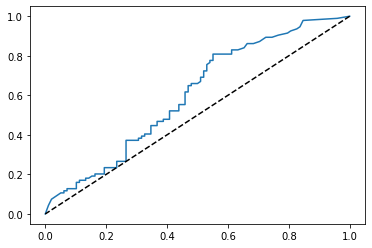

0.604


In [53]:
plt.plot(fpr, tpr)
plt.plot([1,0],[1,0], 'k--')
plt.show()
print(score)

In [54]:
roc = pd.DataFrame({'tpr':tpr, 'fpr': fpr, 'threshold':threshold})
roc.head()

,tpr,fpr,threshold
0,0.000000,0.000000,2.000
1,0.042553,0.010204,1.000
2,0.074468,0.020408,0.999
3,0.095745,0.040816,0.998
4,0.106383,0.051020,0.997


In [57]:
roc['diff'] = roc.tpr - roc.fpr
roc.sort_values('diff', ascending=False)[:5]

,tpr,fpr,threshold,diff
109,0.808511,0.551020,0.034,0.257490
108,0.797872,0.551020,0.038,0.246852
106,0.776596,0.540816,0.048,0.235779
110,0.808511,0.581633,0.032,0.226878
107,0.776596,0.551020,0.046,0.225575


In [59]:
pred['pred_diff'] = pred.apply(lambda x: 1 if x.prob>0.034 else 0, axis =1)
pred.sample(7)

,prob,actual,predicted,pred_diff
26,0.832,1,1,1
39,0.995,1,1,1
168,0.098,1,0,1
113,0.466,1,0,1
139,0.733,1,1,1
140,0.004,1,0,0
95,0.973,0,1,1


In [63]:
confusion_matrix(pred.actual, pred.pred_diff, [1,0])

array([[76, 18],
       [54, 44]])

In [64]:
def get_cost(actual, predicted, fn, fp):
    cm = confusion_matrix(actual, predicted, [1,0])
    return cm[0][1]*fn + cm[1][0]*fp

In [65]:
cost_df = pd.DataFrame(columns=['prob', 'cost'])

In [81]:
idx=0
for i in range(10,100):
    cost = get_cost(pred.actual, pred.prob.map(lambda x: 1 if x>i/100 else 0), 9,5)
    cost_df.loc[idx] = [i/100, cost]
    idx = idx+1

In [82]:
cost_df.sort_values('cost')[0:5]

,prob,cost
1,0.11,549.0
0,0.10,554.0
2,0.12,576.0
3,0.13,585.0
8,0.18,593.0


In [75]:
pred['pred_new'] = pred.prob.map(lambda x: 1 if x>0.98 else 0)
pred.sample(7)

,prob,actual,predicted,pred_diff,pred_new
33,0.132,1,0,1,0
77,0.989,1,1,1,1
92,0.494,0,0,1,0
149,0.021,1,0,0,0
151,0.999,1,1,1,1
11,0.741,1,1,1,0
183,0.001,1,0,0,0


In [76]:
pred['pred_new1'] = pred.prob.map(lambda x: 1 if x>0.11 else 0)
pred.sample(7)

,prob,actual,predicted,pred_diff,pred_new,pred_new1
46,0.069,1,0,1,0,0
134,0.012,0,0,0,0,0
173,0.000,0,0,0,0,0
157,0.962,1,1,1,0,1
141,0.982,0,1,1,1,1
178,1.000,1,1,1,1,1
77,0.989,1,1,1,1,1


In [77]:
confusion_matrix(pred.actual, pred.pred_new, [1,0])

array([[15, 79],
       [11, 87]])

In [78]:
confusion_matrix(pred.actual, pred.pred_new1, [1,0])

array([[58, 36],
       [45, 53]])